In [6]:
import numpy as np

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) -1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print('This matrix is sigular, cannot do inverse')
        return 
    ws = xTx.I * (xMat.T*yMat)
    return ws

xArr,yArr = loadDataSet('E:/pythonNotebook/LinearRegress/ex0.txt')
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [7]:
standRegres(xArr,yArr)

matrix([[ 3.00774324],
        [ 1.69532264]])

In [13]:
print(np.shape(xArr),np.shape(yArr))

(200, 2) (200,)


In [23]:
# 局部加权线性回归函数
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye(m))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = np.exp(diffMat*diffMat.T / (-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print('This maxtrix is singular,cannot do inverse')
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr,xArr,yArr,k=1.0):
    m = np.shape(testArr)[0]
    yHat = np.zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i] , xArr, yArr, k)
    return yHat

yArr[0]

3.176513

In [24]:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[ 3.12204471]])

In [25]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[ 3.20175729]])

In [38]:
yHat = lwlrTest(xArr,xArr,yArr,0.003)

xMat = np.mat(xArr)
strInd = xMat[:.1].argsort(0)
xSort = xMat[strInd][:,0,:]

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[strInd])

D:\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)


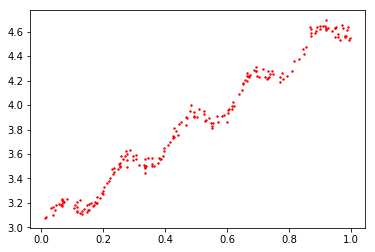

In [39]:
ax.scatter(xMat[:,1].flatten().A[0],np.mat(yArr).T.flatten().A[0],s=2,c='red')
plt.show()

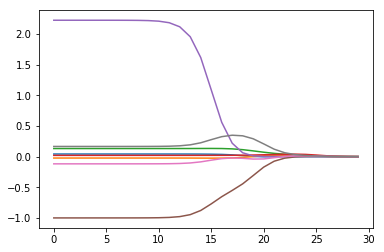

In [49]:
# 岭回归
def ridgeRegres(xMat,yMat,lam = 0.2):
    xTx = xMat.T * xMat
    denom = xTx +np.eye(np.shape(xMat)[1]) * lam
    if np.linalg.det(denom) == 0.0:
        print('This matrix is singular,cannot do inverse')
        return
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean
    xMeans = np.mean(xMat,0)
    xVar = np.var(xMat,0)
    xMat = (xMat - xMeans) / xVar
    numTestPts = 30
    wMat = np.zeros((numTestPts,np.shape(xMat)[1]))
    for i in range(numTestPts):
        ws  = ridgeRegres(xMat,yMat,np.exp(i-10))
        wMat[i,:] = ws.T
    return wMat

abX,abY = loadDataSet('E:/pythonNotebook/LinearRegress/abalone.txt')
ridgesWeights = ridgeTest(abX,abY)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgesWeights)
plt.show()

In [50]:
######lasso
#向前逐步线性回归
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

def stageWise(xArr,yArr,eps = 0.01,numIt=100):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean
    xMat = np.regularize(xMat)
    m,n = shape(xMat)
    returnMat = np.zeros((numIt,n))
    ws = np.zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = inf;    #无穷
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat
        
        